In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv(r'C:\Users\91959\Downloads\50_Startups.csv')

In [3]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
df.tail()

,R&D Spend,Administration,Marketing Spend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        38 non-null     float64
 1   Administration   32 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [6]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,38.000000,32.000000,50.000000,50.000000
mean,84471.755526,124460.951250,211025.097800,112012.639200
std,47140.937802,24360.580496,122290.310726,40306.180338
min,0.000000,51743.150000,0.000000,14681.400000
25%,65716.990000,113049.002500,129300.132500,90138.902500
50%,82404.585000,125604.625000,212716.240000,107978.190000
75%,120392.700000,145190.700000,299469.085000,139765.977500
max,165349.200000,157693.920000,471784.100000,192261.830000


In [7]:
df.isnull()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
5,False,False,False,False,False
6,False,False,False,False,False
7,False,False,False,False,False
8,False,False,False,False,False
9,False,False,False,False,False


In [8]:
df.isnull().sum()

R&D Spend          12
Administration     18
Marketing Spend     0
State               0
Profit              0
dtype: int64

In [10]:
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [11]:
df['State'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [12]:
df['State']=df['State'].replace({'New York':0, 'California':1, 'Florida':2})

In [13]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,0,192261.83
1,162597.70,151377.59,443898.53,1,191792.06
2,153441.51,101145.55,407934.54,2,191050.39
3,144372.41,118671.85,383199.62,0,182901.99
4,142107.34,91391.77,366168.42,2,166187.94


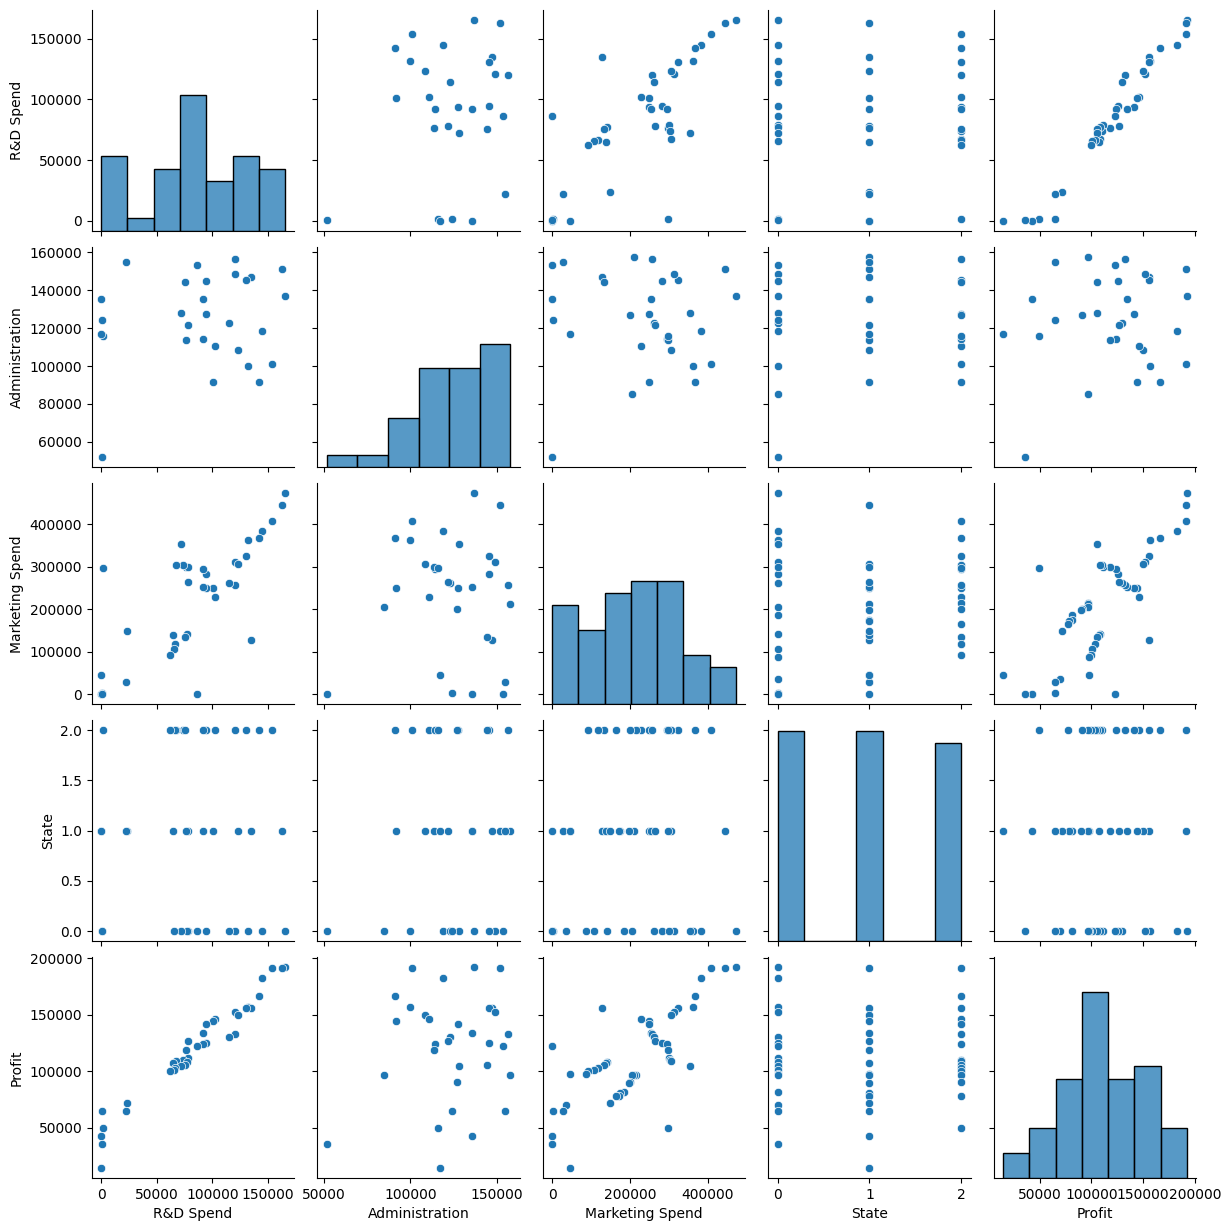

In [14]:
sns.pairplot(df)

In [15]:
correlation_matrix = df.corr()
correlation_matrix

,R&D Spend,Administration,Marketing Spend,State,Profit
R&D Spend,1.000000,0.162234,0.745607,0.018537,0.976569
Administration,0.162234,1.000000,-0.024572,0.070931,0.131789
Marketing Spend,0.745607,-0.024572,1.000000,0.137777,0.747766
State,0.018537,0.070931,0.137777,1.000000,0.048471
Profit,0.976569,0.131789,0.747766,0.048471,1.000000


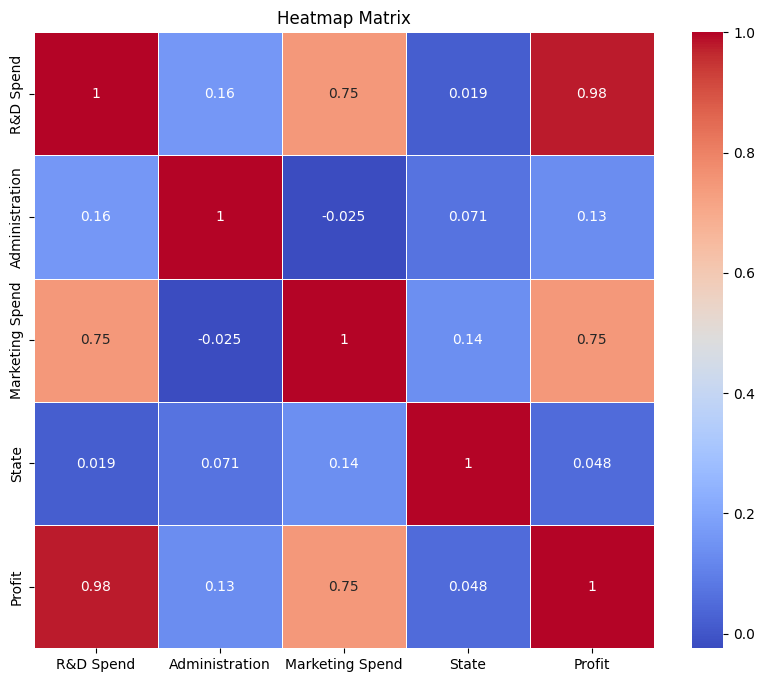

In [16]:
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',linewidths=0.5)
plt.title('Heatmap Matrix')
plt.show()

In [17]:
x=df.iloc[:,:-1].values       #int location based indexing 
y=df.iloc[:,-1].values

In [18]:
from sklearn.impute import SimpleImputer                              #used for handling missing data in datasets 
imputer = SimpleImputer(missing_values=np.nan,strategy='mean')
x=imputer.fit_transform(x)

In [20]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state =2529)

In [21]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((35, 4), (15, 4), (35,), (15,))

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [24]:
y_pred = lr.predict(x_test)

In [26]:
y_pred

array([105656.27199713,  25144.99279266, 107098.38542972,  27977.99757825,
        60681.76380832, 124420.47310669,  89034.50132373,  61658.06866712,
       112882.82315852, 192428.93923608, 137692.56515665, 189883.61915074,
       122542.1890513 , 156482.35481107,  98164.2117722 ])

In [29]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

In [30]:
mean_absolute_error(y_test,y_pred)   #used to calculate the performance of regression model  -- used to measure the av magnitude of error btwn pred & act value

15399.11490799541

In [31]:
mean_absolute_percentage_error(y_test,y_pred)    

0.1824277589498697

In [35]:
lr.score(x_test,y_test)

0.8400788466040675